In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [87]:
import re
sns.set()
data40M = pd.read_csv("data40M.csv", dtype={'time':np.float64})

data40 = pd.read_csv("data40.csv", dtype={'time':np.float64})

data = pd.concat([data40, data40M], ignore_index=True)

data['error'] = [float(x[1:-1]) for x in data['fbest']]

def sanitize(data):
    return ''.join(filter(lambda x: x in ',.0123456789', data))

data['history'] = data['fhistory'].apply(sanitize)
data['ctime'] = data['currenttime'].apply(sanitize)

data['frac'] = data['sol'].str.count("1")/40

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0", "fhistory", "currenttime"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data['crossover'] = data['crossover'].str.replace("NotModalSixPoint", "TwoPoint")
data['crossover'] = data['crossover'].str.replace("Modal40Point", "TenPoint")

data.head()

,crossover,errorLimit,f1,grad,nPop,sol,time,error,history,ctime,frac,1,2,3,4,5,6
0,TwoPoint,0.01,75,150,40,1110011111010011111001000100111000000000,10814.631611,11.983678,"31.78390576,20.56259773,20.56259773,20.5625977...","361.0089016,488.02307749,608.41313672,716.9297...",0.475,72.542449,225.147099,346.176307,531.558687,725.976685,857.156869
1,TwoPoint,0.01,75,150,40,0110111111110001001100110010011000000000,10811.122211,10.784153,"33.3268061,33.3268061,29.14432117,23.32827619,...","430.19342685,534.31689811,654.71736026,701.953...",0.450,73.506189,217.292723,347.818882,546.160542,712.068536,835.615592
2,TwoPoint,0.01,75,150,40,1110111010100011101001100010001000000000,10819.008813,12.154765,"35.42591578,27.06929934,27.06929934,27.0692993...","389.32538033,515.25096512,633.40584636,757.752...",0.400,75.525838,230.031535,347.289069,508.163564,725.491010,863.167264
3,TwoPoint,0.01,75,150,40,1001100111011111111110010011000000000100,10809.934290,11.214878,"28.85983137,25.56035478,21.57138858,19.3513473...","404.55849433,565.45567775,699.076087,771.12895...",0.500,72.063945,239.128806,366.041595,497.155998,704.742868,859.772915
4,TwoPoint,0.01,75,150,40,0111101100111010011100100110010000000000,10820.403255,12.051828,"34.00364572,34.00364572,31.45298839,29.9553726...","381.67282343,485.63024163,609.12798524,742.376...",0.425,74.202585,219.914297,342.523994,527.466231,719.939105,861.395456


In [88]:
history = data.drop(['errorLimit', 'sol', 'time', 'frac', "f1", "grad", "error"], axis=1)
history.drop([x for x in history.columns if type(x)==int], axis=1, inplace=True)
history = pd.concat([history, history['history'].str.split(',', expand=True).apply(pd.to_numeric)], axis=1)
history.drop(["history"], axis=1, inplace=True)

history["ctime"] = history['ctime'].str.split(',', expand=False).apply(pd.to_numeric)

history.head()

,crossover,nPop,ctime,0,1,2,3,4,5,6,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,TwoPoint,40,"[361.0089016, 488.02307749, 608.41313672, 716....",31.783906,20.562598,20.562598,20.562598,19.324376,19.324376,19.324376,...,11.983678,11.983678,11.983678,11.983678,11.983678,11.983678,11.983678,11.983678,11.983678,11.983678
1,TwoPoint,40,"[430.19342685, 534.31689811, 654.71736026, 701...",33.326806,33.326806,29.144321,23.328276,23.328276,23.328276,23.328276,...,10.784153,10.784153,10.784153,10.784153,10.784153,10.784153,10.784153,10.784153,10.784153,10.784153
2,TwoPoint,40,"[389.32538033, 515.25096512, 633.40584636, 757...",35.425916,27.069299,27.069299,27.069299,24.064043,24.064043,21.892797,...,12.154765,12.154765,12.154765,12.154765,12.154765,12.154765,12.154765,12.154765,12.154765,12.154765
3,TwoPoint,40,"[404.55849433, 565.45567775, 699.076087, 771.1...",28.859831,25.560355,21.571389,19.351347,19.351347,14.606760,14.569105,...,11.214878,11.214878,11.214878,11.214878,11.214878,11.214878,11.214878,11.214878,11.214878,11.214878
4,TwoPoint,40,"[381.67282343, 485.63024163, 609.12798524, 742...",34.003646,34.003646,31.452988,29.955373,27.708674,27.708674,26.313462,...,12.051828,12.051828,12.051828,12.051828,12.051828,12.051828,12.051828,12.051828,12.051828,12.051828


In [89]:
tseries = [[],[]]
for index, row in history.iterrows():
    tseries[1].append(pd.Series([row[x] for x in history.columns if type(x)==int], index=row["ctime"]/60).truncate(after=61))
    tseries[0].append(row["crossover"])


In [90]:
x = pd.DataFrame()

for index, i in enumerate(tseries[1]):
    x = x.append({"error": i.iloc[-1], "crossover": tseries[0][index]}, ignore_index=True)

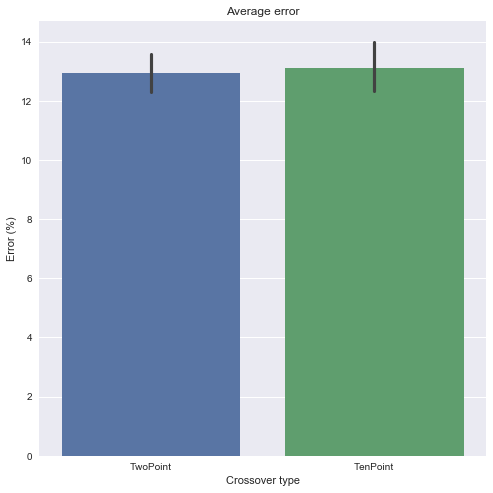

In [91]:
fig = plt.figure(figsize=(8, 8))

sns.barplot(x="crossover", y="error", data=x)
plt.title("Average error")
plt.xlabel("Crossover type")
plt.ylabel("Error (%)")
plt.show()

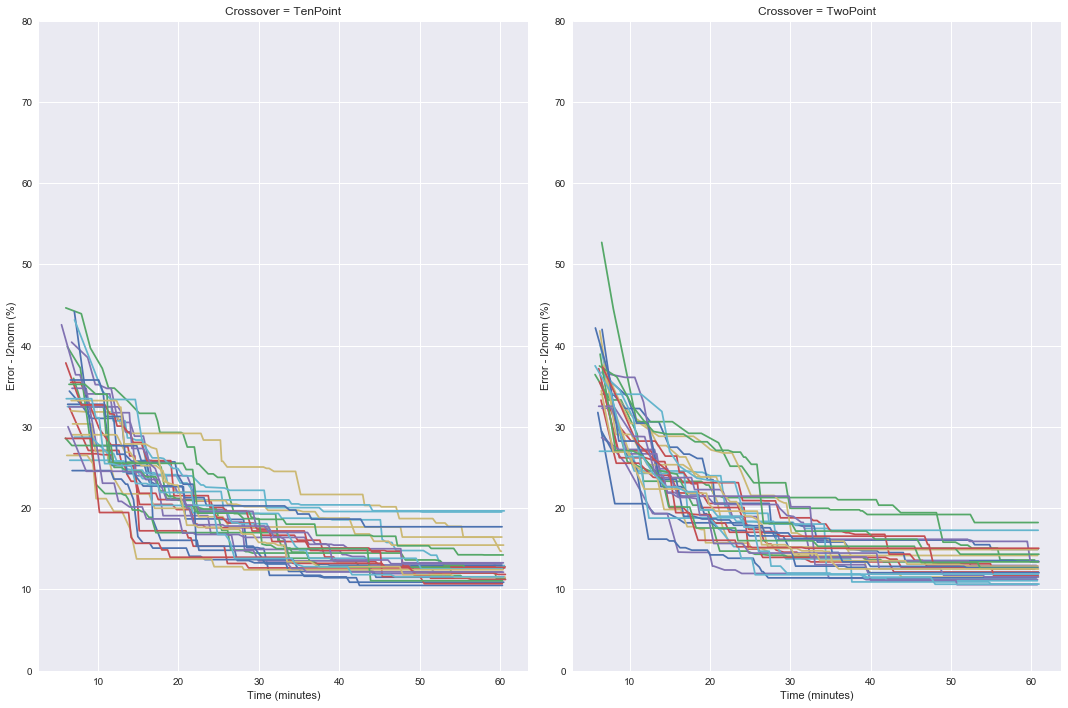

In [92]:
fig = plt.figure(figsize=(15, 10))

for index, i in enumerate(["TenPoint", "TwoPoint"]):
    fig.add_subplot(1, 2, index+1)
    popseries = [tseries[1][x] for x in range(len(tseries[0])) if tseries[0][x] == i]
    for k in popseries:
        plt.plot(k)
    plt.title("Crossover = {}".format(i))
    plt.xlabel("Time (minutes)")
    plt.ylabel("Error - l2norm (%)")
    plt.ylim([0, 80])
    
plt.tight_layout()
plt.show()